# Exposure fusion
This notebook implements exposure fusion, which was introduced by Merten et al. This implementation was done based on openCV's instruction, which is well guided. 
 
There are serveral steps in the Merten's paper, but they are just embedded in the openCV functions. So I will go over each step in the following post. 

In [1]:
import os
import cv2 
import matplotlib.pyplot as plt
from matplotlib import gridspec

In [2]:
def readImagesAndTimes():
    path = os.getcwd() + "/images/"
    
    filenames = []    
    for i in range(4):
        filenames.append(path + "/img" + str(i) +".jpg")
        
#    print(filenames)
    images = []
    for filename in filenames:
        im = cv2.imread(filename)
        images.append(im)
  
    return images


def showImages(images):
    n_image = len(images)
    w, h = len(images[0]),len(images[0][0])
    w_grid = w*(n_image+1)
    fig = plt.figure(constrained_layout=False,figsize=(20,20))
    gs = gridspec.GridSpec(h,w_grid,figure=fig)
    s1=0

    ax = fig.add_subplot(gs[:,0:w],aspect='equal')
    ax.imshow(cv2.cvtColor(images[0],cv2.COLOR_BGR2RGB))
    ax.set_title('overexposured <--------',fontsize=15)
    
    for i in range(1,n_image):
        ax = fig.add_subplot(gs[:,w*i+50*i:w*(i+1)+50*i],aspect='equal')
        ax.imshow(cv2.cvtColor(images[i],cv2.COLOR_BGR2RGB))
        ax.set_xticks([])
        ax.set_yticks([])
        
        if i==n_image-1:
            ax.set_title('--------> underexposured',fontsize=15)
    

In [3]:
images = readImagesAndTimes()

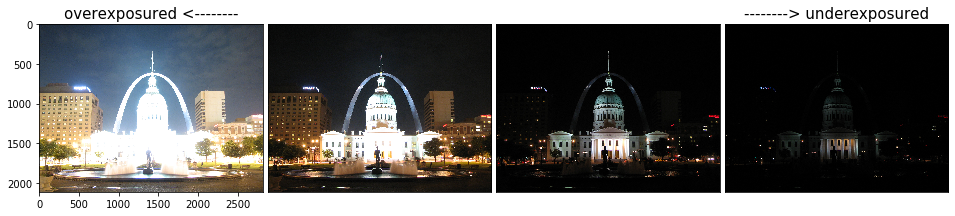

In [4]:
showImages(images)

In [7]:
# Align input images
alignMTB = cv2.createAlignMTB()
alignMTB.process(images, images)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Text(0.5, 1.0, 'merged image')

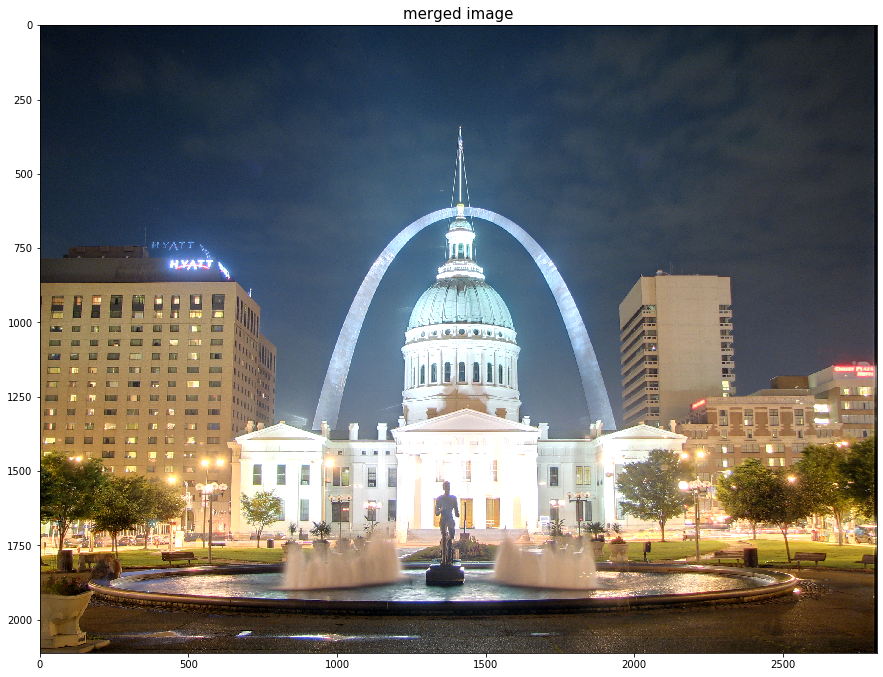

In [25]:
mergeMertens = cv2.createMergeMertens()

mergeMertens.setExposureWeight(1)
mergeMertens.setSaturationWeight(1)
mergeMertens.setContrastWeight(1)

exposureFusion = mergeMertens.process(images)

#cv2.imwrite("exposureFusion.hdr", exposureFusion)

plt.figure(constrained_layout=False,figsize=(15,15))
plt.imshow(cv2.cvtColor(exposureFusion,cv2.COLOR_BGR2RGB))
plt.title("merged image", fontsize=15)